In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
import tensorflow as tf

2023-12-13 16:44:49.931493: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 16:44:49.996338: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 16:44:50.480742: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 16:44:50.483421: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 16:44:51.484662: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
x_train = load_x_train()
x_test = load_x_test()
y_train = load_y_train()
y_test = load_y_test()

# Prints dataset shapes
verify_all_datasets()

modelLoad = tf.keras.models.load_model('model/main.keras')


x_train shape: (20000, 784)

y_train shape: (20000, 1)

x_test shape: (20000, 784)

y_test shape: (20000, 1)


2023-12-13 16:44:59.056520: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:
# mean absolute error for test and training sets

decisionTree = tree.DecisionTreeClassifier()
scores_test = cross_val_score(decisionTree, x_test, y_test, cv=8)
print(scores_test)
print(scores_test.mean())


scores_train = cross_val_score(decisionTree, x_train, y_train, cv=8)
print(scores_train)

print(scores_train.mean())

err_cv = abs(scores_test.mean())

[0.7352 0.7332 0.7328 0.74   0.7352 0.738  0.7232 0.7308]
0.7335499999999999
[0.7428 0.7288 0.7376 0.7388 0.7316 0.7452 0.746  0.732 ]
0.7378499999999999


In [4]:
# Percentage
# Format -> Loss, Accuracy

modelLoad.evaluate(x_train, y_train), modelLoad.evaluate(x_test, y_test)

625/625 [==============================] - 1s 1ms/step - loss: 0.3360 - accuracy: 0.9459


([0.3483787477016449, 0.9427000284194946],
 [0.3360329568386078, 0.9458500146865845])

1/1 [==============================] - 0s 18ms/step


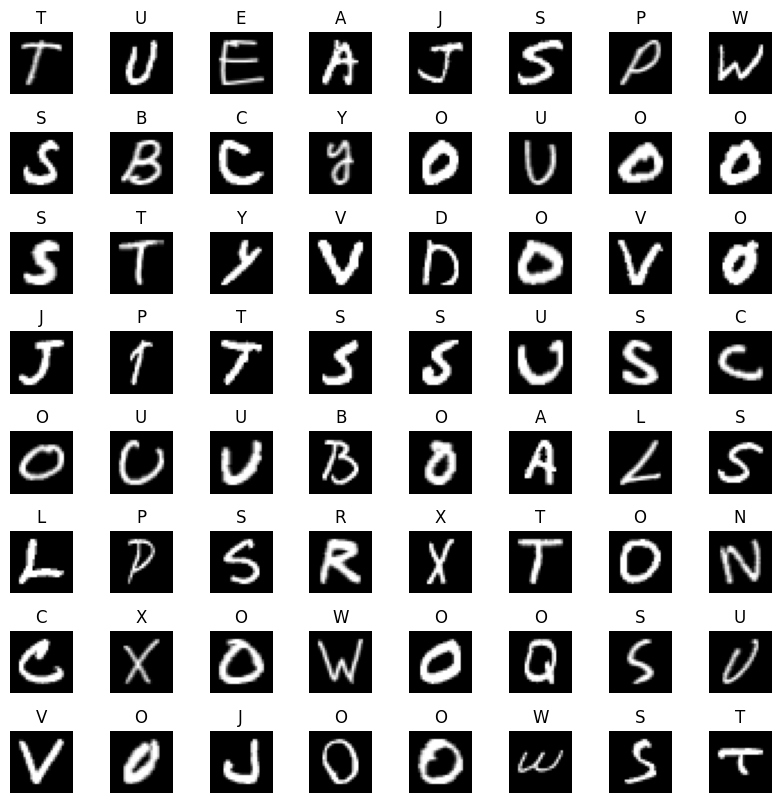

In [5]:
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

test = np.reshape(x_test.values, (x_test.shape[0], 28,28)) # To display as image

m,n = x_test.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)


# Labels are Predictions from the model.
for i,ax in enumerate(axes.flat):

    i = np.random.randint(m)

    ax.imshow(test[i], cmap='gray')
    
    predict = modelLoad.predict(test[i].reshape(1,784)) # reshapes into 1D flattened images
    
    ax.set_title(alphabets[np.argmax(predict)])
    ax.set_axis_off()
    